# Analyse The Picture Of Dorian Gray Book 

In [1]:
import pandas as pd
import tweepy
import emoji
import re
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
from PIL import Image
import nltk
import nltk.tokenize 
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk import FreqDist
#nltk.download('punkt')
from nltk.corpus import stopwords
stopwords.words('english')
from collections import Counter
%matplotlib inline

In [2]:
%run ./keys.ipynb

## authentication to twitter API 

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
# create lists where we will store twitter data
num_of_tweets = 1000
tweets = []
likes = []
time = []

## retrieving and save tweet

In [5]:
#create a query to retrieve the tweet related to the book by choosing some parameters (language, date ...)
query = 'The Picture of Dorian Gray'
for i in tweepy.Cursor(api.search, q = query, Since = '2021-01-01', lang = 'en', tweet_mode = "extended").items(num_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count) 
    time.append(i.created_at)

In [6]:
# put tweets in datafram and save as csv file 
Picture_of_Dorian_Gray_raw = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})
Picture_of_Dorian_Gray_raw.to_csv('Picture_of_Dorian_Gray_raw.csv', header = True, index = False, index_label = None, encoding = "UTF8")

## cleaning the tweets 

In [7]:
# clean RT and reset indexing
Picture_of_Dorian_Gray_cleaning = Picture_of_Dorian_Gray_raw[~Picture_of_Dorian_Gray_raw.tweets.str.contains("RT")]
Picture_of_Dorian_Gray_cleaning = Picture_of_Dorian_Gray_cleaning.reset_index(drop = True)

In [8]:
Picture_of_Dorian_Gray_cleaning["tweets"] = Picture_of_Dorian_Gray_cleaning["tweets"].str.replace("\n", " ") 

In [9]:
# cleaning https hashtag usertag emoji symbole 
for i in range(len(Picture_of_Dorian_Gray_cleaning['tweets'])):
    clean_tweet = re.sub("https://[A-Za-z0-9./]+", "", Picture_of_Dorian_Gray_cleaning['tweets'].values[i]).strip()
    clean_tweet = clean_tweet.lower()
    clean_tweet = re.sub("@[A-Za-z0-9_]+ ", "", clean_tweet) 
    clean_tweet = re.sub("#[A-Za-z0-9_]+ ", "", clean_tweet)
    clean_tweet = emoji.get_emoji_regexp().sub(r'', clean_tweet)
    clean_tweet = re.sub("[)(!,/;&-?\★@.“☀☆”✧⋇⋆#✦ಥ‿ಥ•^%]+", "", clean_tweet)
    clean_tweet = clean_tweet.strip()
    Picture_of_Dorian_Gray_cleaning['tweets'].values[i] = clean_tweet

In [10]:
# vérification of cleaning 
Picture_of_Dorian_Gray_cleaning["tweets"].values[0:]

array(['not me creating a murder to do list for the characters that i hate the most  and also not me titling the lord henry from picture of the dorian gray at the top because he’s an asshole misogynist',
       'i think that qualifies as a form of hate speech frydenburg morrison really hate any discourse which reflects the picture of dorian gray their govt is to paraphrase sam maiden  they drink their own bath water gaslighting and toxic positivity  like trump  is their way',
       'the picture of dorian gray ambageni',
       'chiltern classic series is so beautiful  want the picture of dorian gray but its not available in the store',
       'picture of dorian gray is really good but if you don’t want to read a full novel i suggest starting out with some of his plays the importance of being ernest amp a woman of no importance were a couple of my favs',
       'currently manifesting a picture of dorian gray situation where each time i stub my toe or slam my elbow into something the st

## save Data clean as csv file

In [11]:
Picture_of_Dorian_Gray_cleaning.to_csv('Picture_of_Dorian_Gray_clean.csv', header = True, index = False, index_label = None)

## Analyse of tweets and visualization

In [12]:
# transform twittes to text
tweet_text = str(Picture_of_Dorian_Gray_cleaning['tweets'].values)
tweet_text = tweet_text.replace("\'\n", "")
tweet_text = tweet_text.replace("\'", "")

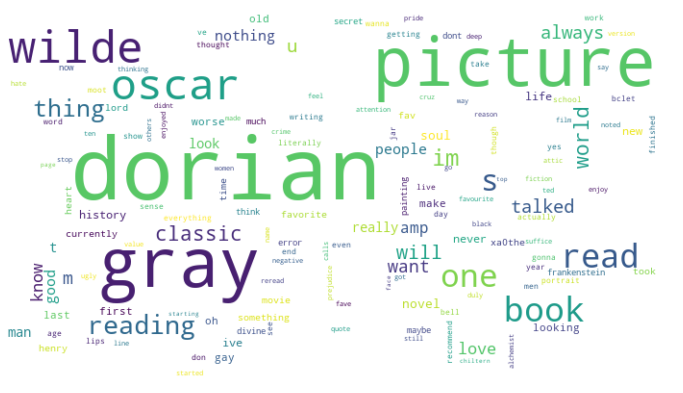

In [13]:
# wordc loud visualization
def plot_word_cloud(tweet_text, masque) :
    mask_coloring = np.array(Image.open(str(masque)))
    wc = WordCloud(width = 600, height = 600, background_color = "white", max_words = 150,
                   mask = mask_coloring, max_font_size = 90,
                   collocations = False, random_state = 42, margin = 2)

    plt.figure(figsize = (12,8))
    wc.generate(tweet_text)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file('Twitter.jpg')

plot_word_cloud(tweet_text, 'E:\\Logos.png')

#### so we have a lot of words that stand out, are related to the book but also words that express a return of the book

In [14]:
# tokenization of the tweets text
token = nltk.word_tokenize(tweet_text)
filtered = [word for word in token if word not in stopwords.words('english')]

In [15]:
# creat a list of bigrams and trigrams that found in the of tweets
bigrams = list(ngrams(filtered, 2))
trigrams = list(ngrams(filtered, 3))

In [16]:
# count Occurency of bigrams and trigrams words in the list of tweets 
a = Counter(bigrams)
b = Counter(trigrams) 

In [17]:
# transform it to DataFram and keep top 30 of bigrams and trigrams
df_bigram = pd.DataFrame.from_records(a.most_common(30), columns = ['bigram', 'count'])
df_trigram = pd.DataFrame.from_records(b.most_common(30), columns = ['trigram', 'count'])

In [18]:
df_bigram.head()

,bigram,count
0,"(dorian, gray)",367
1,"(picture, dorian)",354
2,"(oscar, wilde)",90
3,"(gray, oscar)",45
4,"(wilde, picture)",40


In [19]:
df_trigram.head()

,trigram,count
0,"(picture, dorian, gray)",352
1,"(dorian, gray, oscar)",45
2,"(gray, oscar, wilde)",45
3,"(wilde, picture, dorian)",39
4,"(oscar, wilde, picture)",34


<AxesSubplot:xlabel='count', ylabel='bigram'>

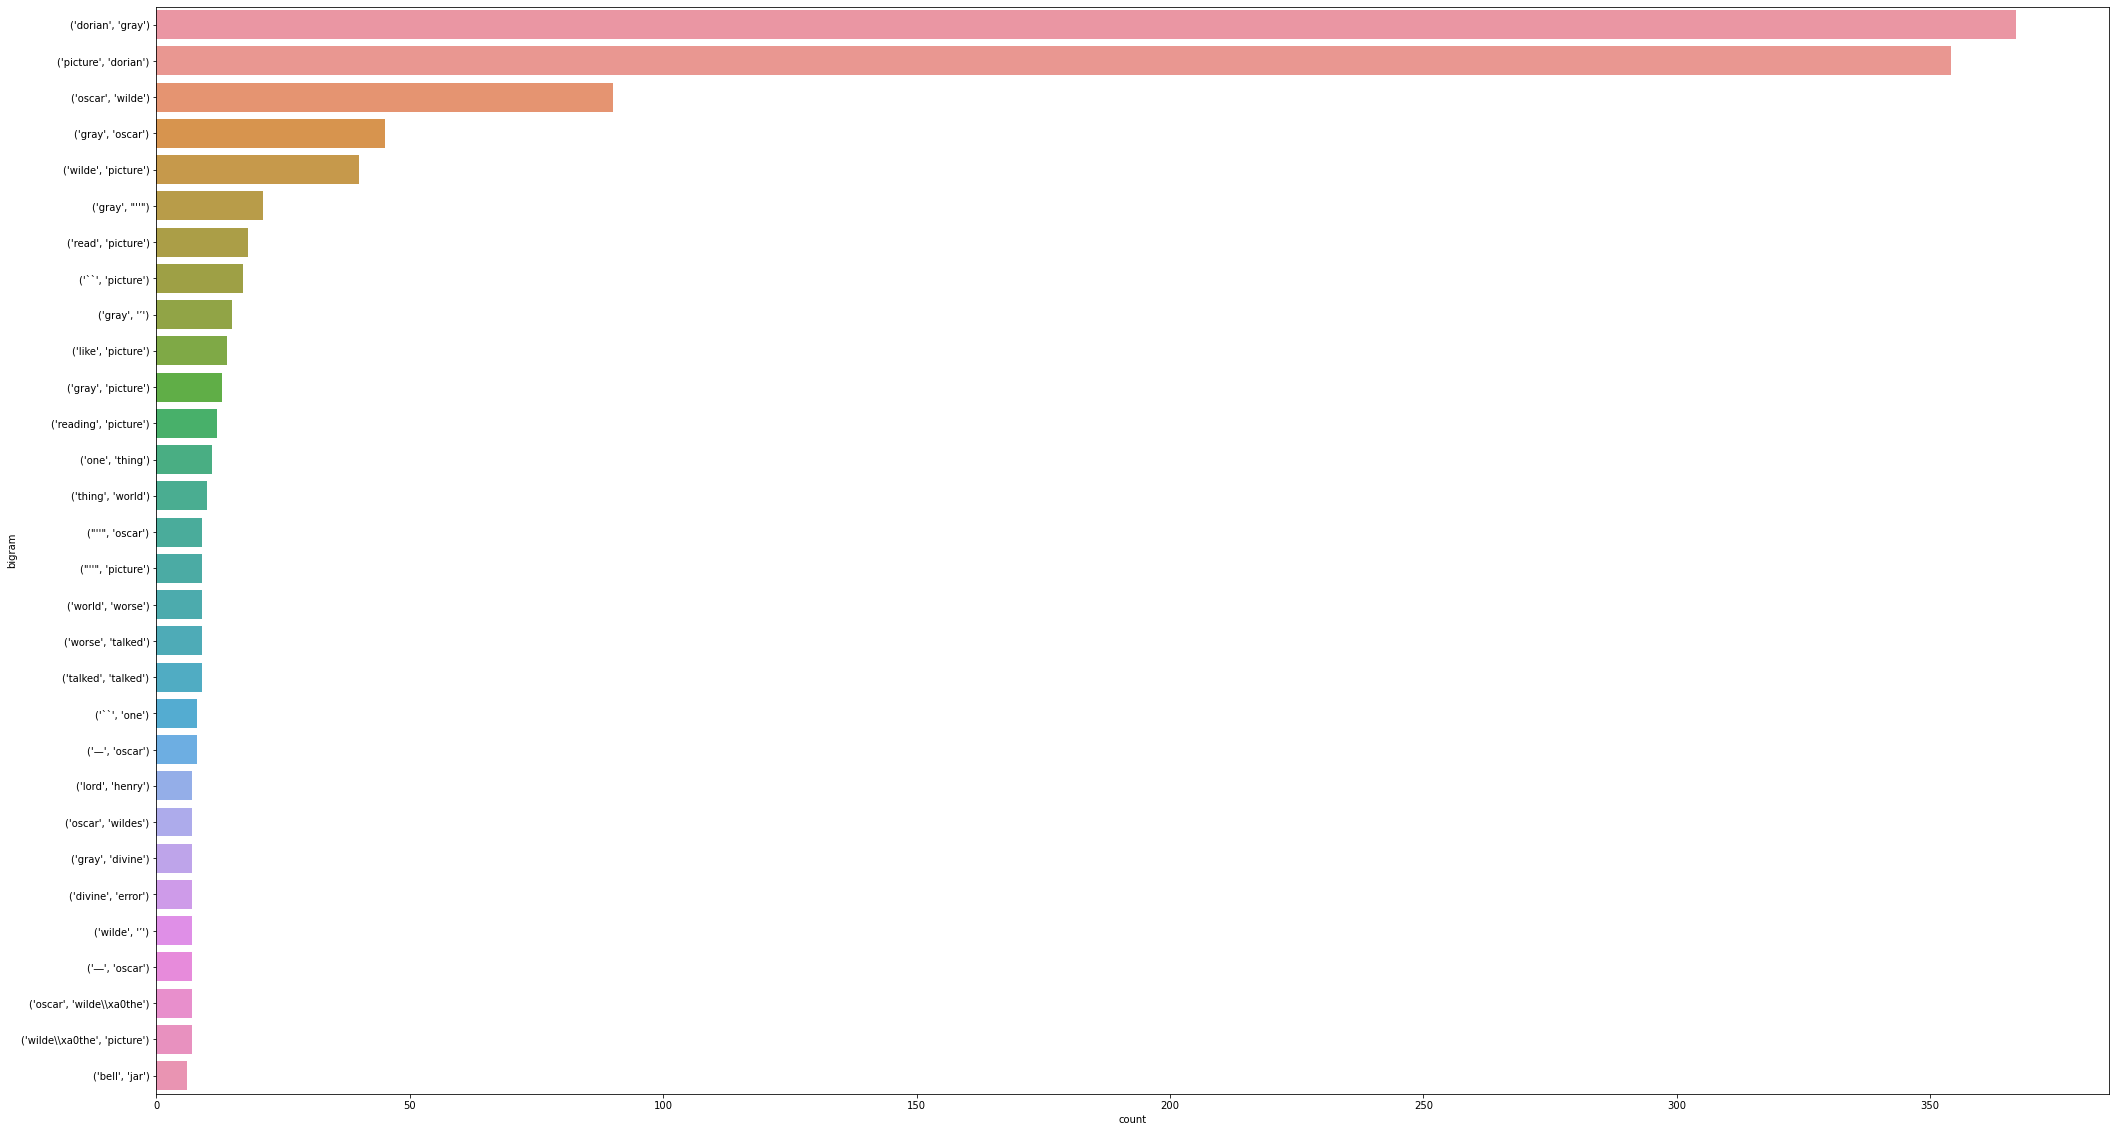

In [20]:
# bigrams visualization 
plt.figure(figsize = (35, 20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_bigram['count'], y = df_bigram['bigram'])

###### we find many associations of words related to the title, the author or the characters of the book, or the words "read" "reading" "things"

<AxesSubplot:xlabel='count', ylabel='trigram'>

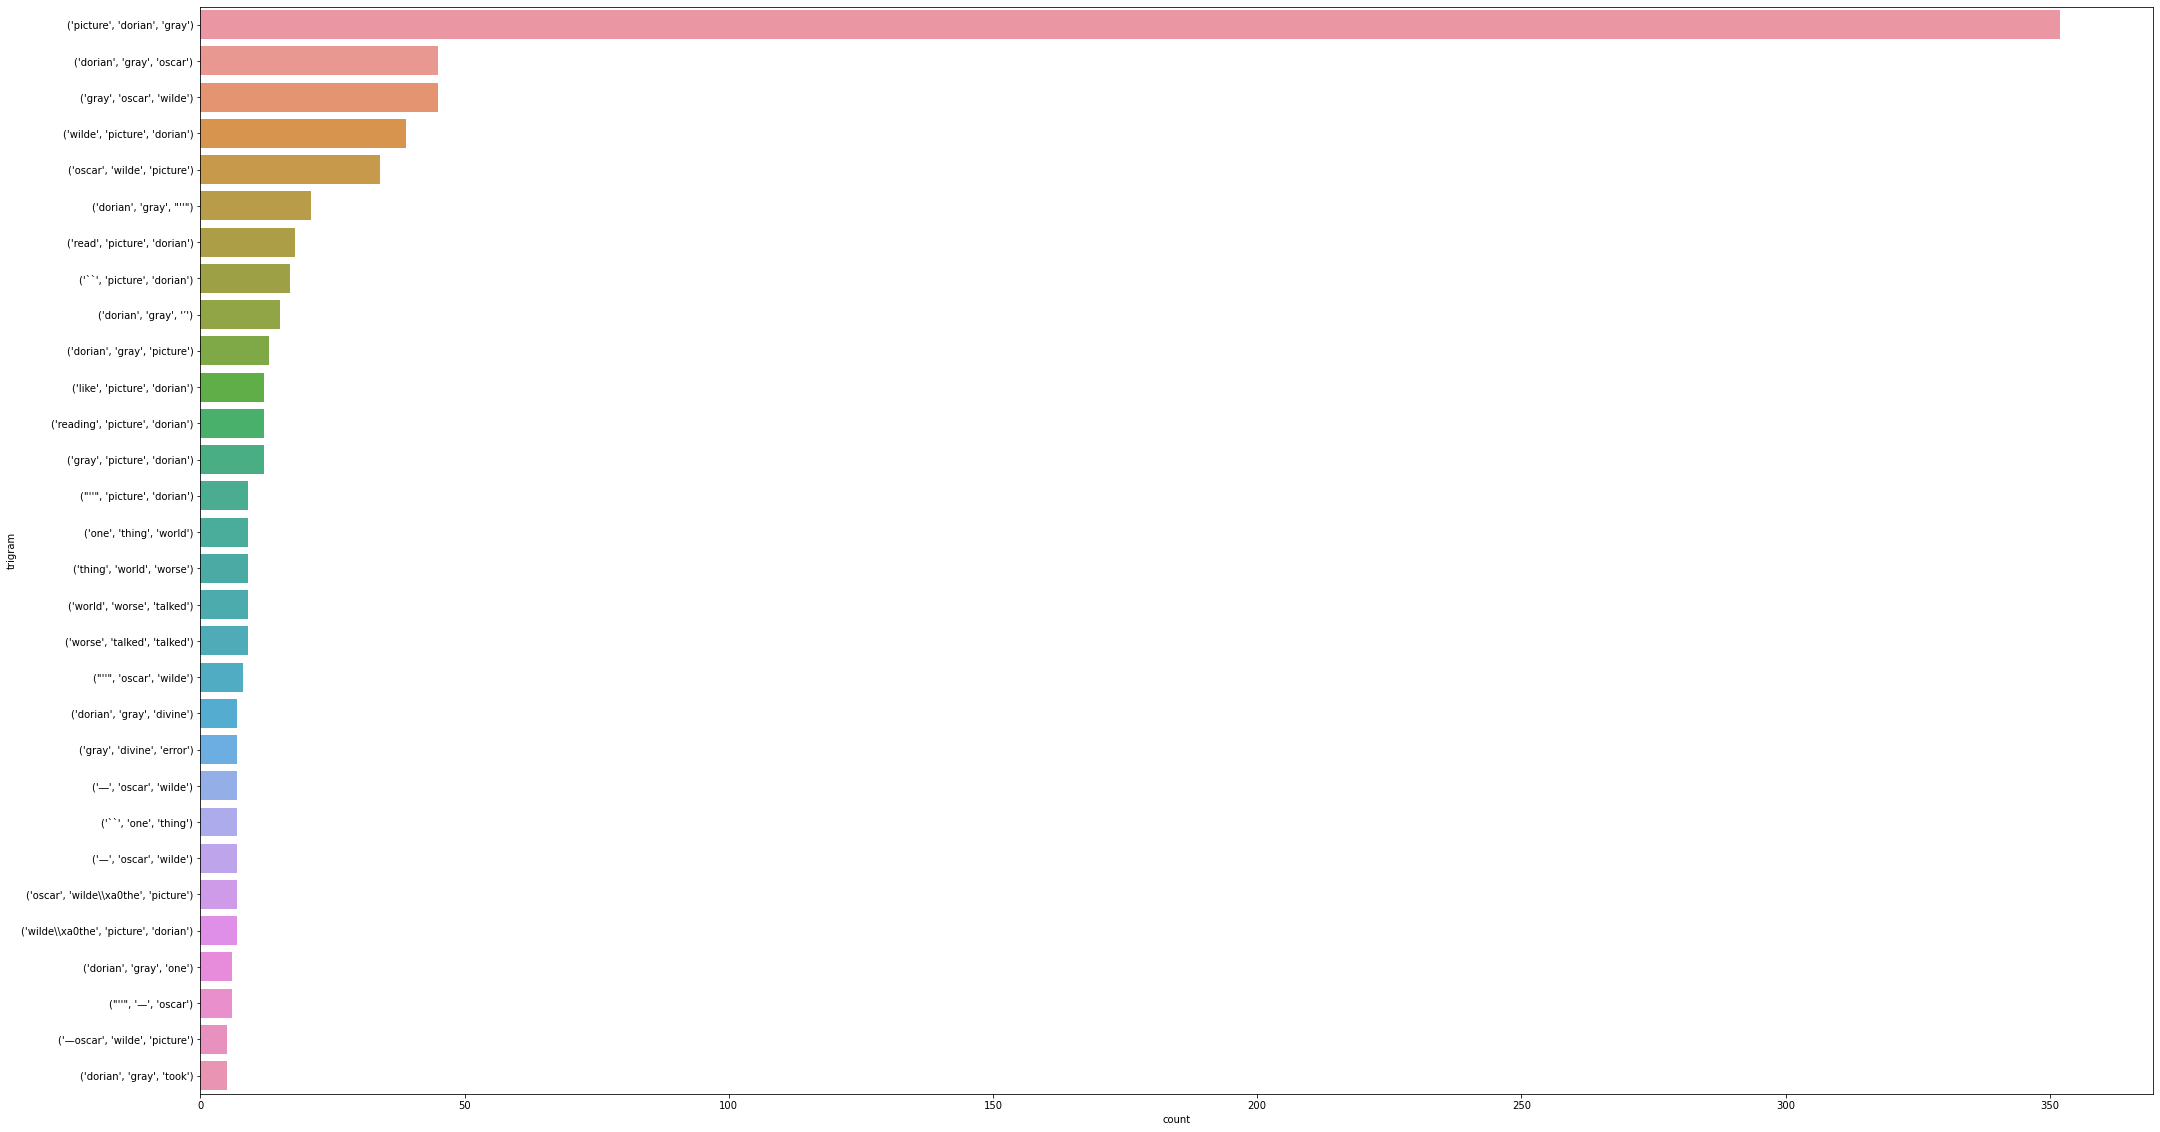

In [21]:
# trigrams visualization
plt.figure(figsize = (35,20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_trigram['count'], y = df_trigram['trigram'])

##### we find less association of words than the bigram, also related to the title, the author or the characters of the book, or the words "read" "divine"

In [22]:
# remove all words that take place in visualisation, bigrams and trigrams
tweet_text = tweet_text.replace("picture", "")
tweet_text = tweet_text.replace("dorian", "")
tweet_text = tweet_text.replace("book", "")
tweet_text = tweet_text.replace("read", "")
tweet_text = tweet_text.replace("reading", "")
tweet_text = tweet_text.replace("oscar", "")
tweet_text = tweet_text.replace("wilde", "")
tweet_text = tweet_text.replace("gray", "")

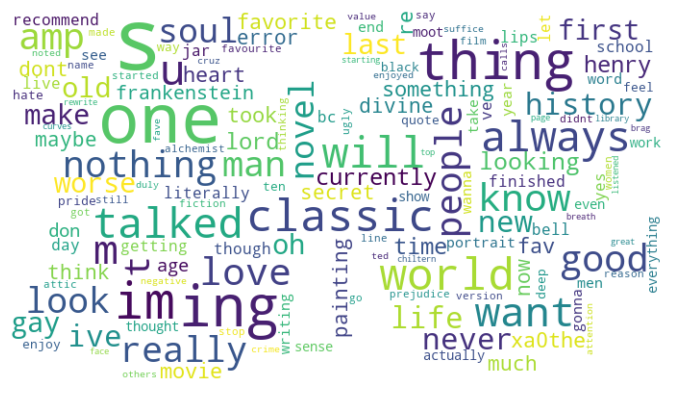

In [23]:
# wordc loud visualization
def plot_word_cloud(tweet_text, masque) :
    mask_coloring = np.array(Image.open(str(masque)))
    wc = WordCloud(width = 600, height = 600, background_color = "white", max_words = 150,
                   mask = mask_coloring, max_font_size = 90,
                   collocations = False, random_state = 42, margin = 2)

    plt.figure(figsize = (12, 8))
    wc.generate(tweet_text)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file('Twitter.jpg')

plot_word_cloud(tweet_text, 'E:\\Logos.png')

##### we find more words which express a return concerning the book like, "love", "good", "recommend", "classic", "favorite"

In [24]:
token = nltk.word_tokenize(tweet_text)
filtered = [word for word in token if word not in stopwords.words('english')]

In [25]:
bigrams = list(ngrams(filtered, 2))
trigrams = list(ngrams(filtered, 3))

In [26]:
a = Counter(bigrams)
b = Counter(trigrams) 

In [27]:
df_bigram = pd.DataFrame.from_records(a.most_common(30), columns = ['bigram','count'])
df_trigram = pd.DataFrame.from_records(b.most_common(30), columns = ['trigram','count'])

<AxesSubplot:xlabel='count', ylabel='bigram'>

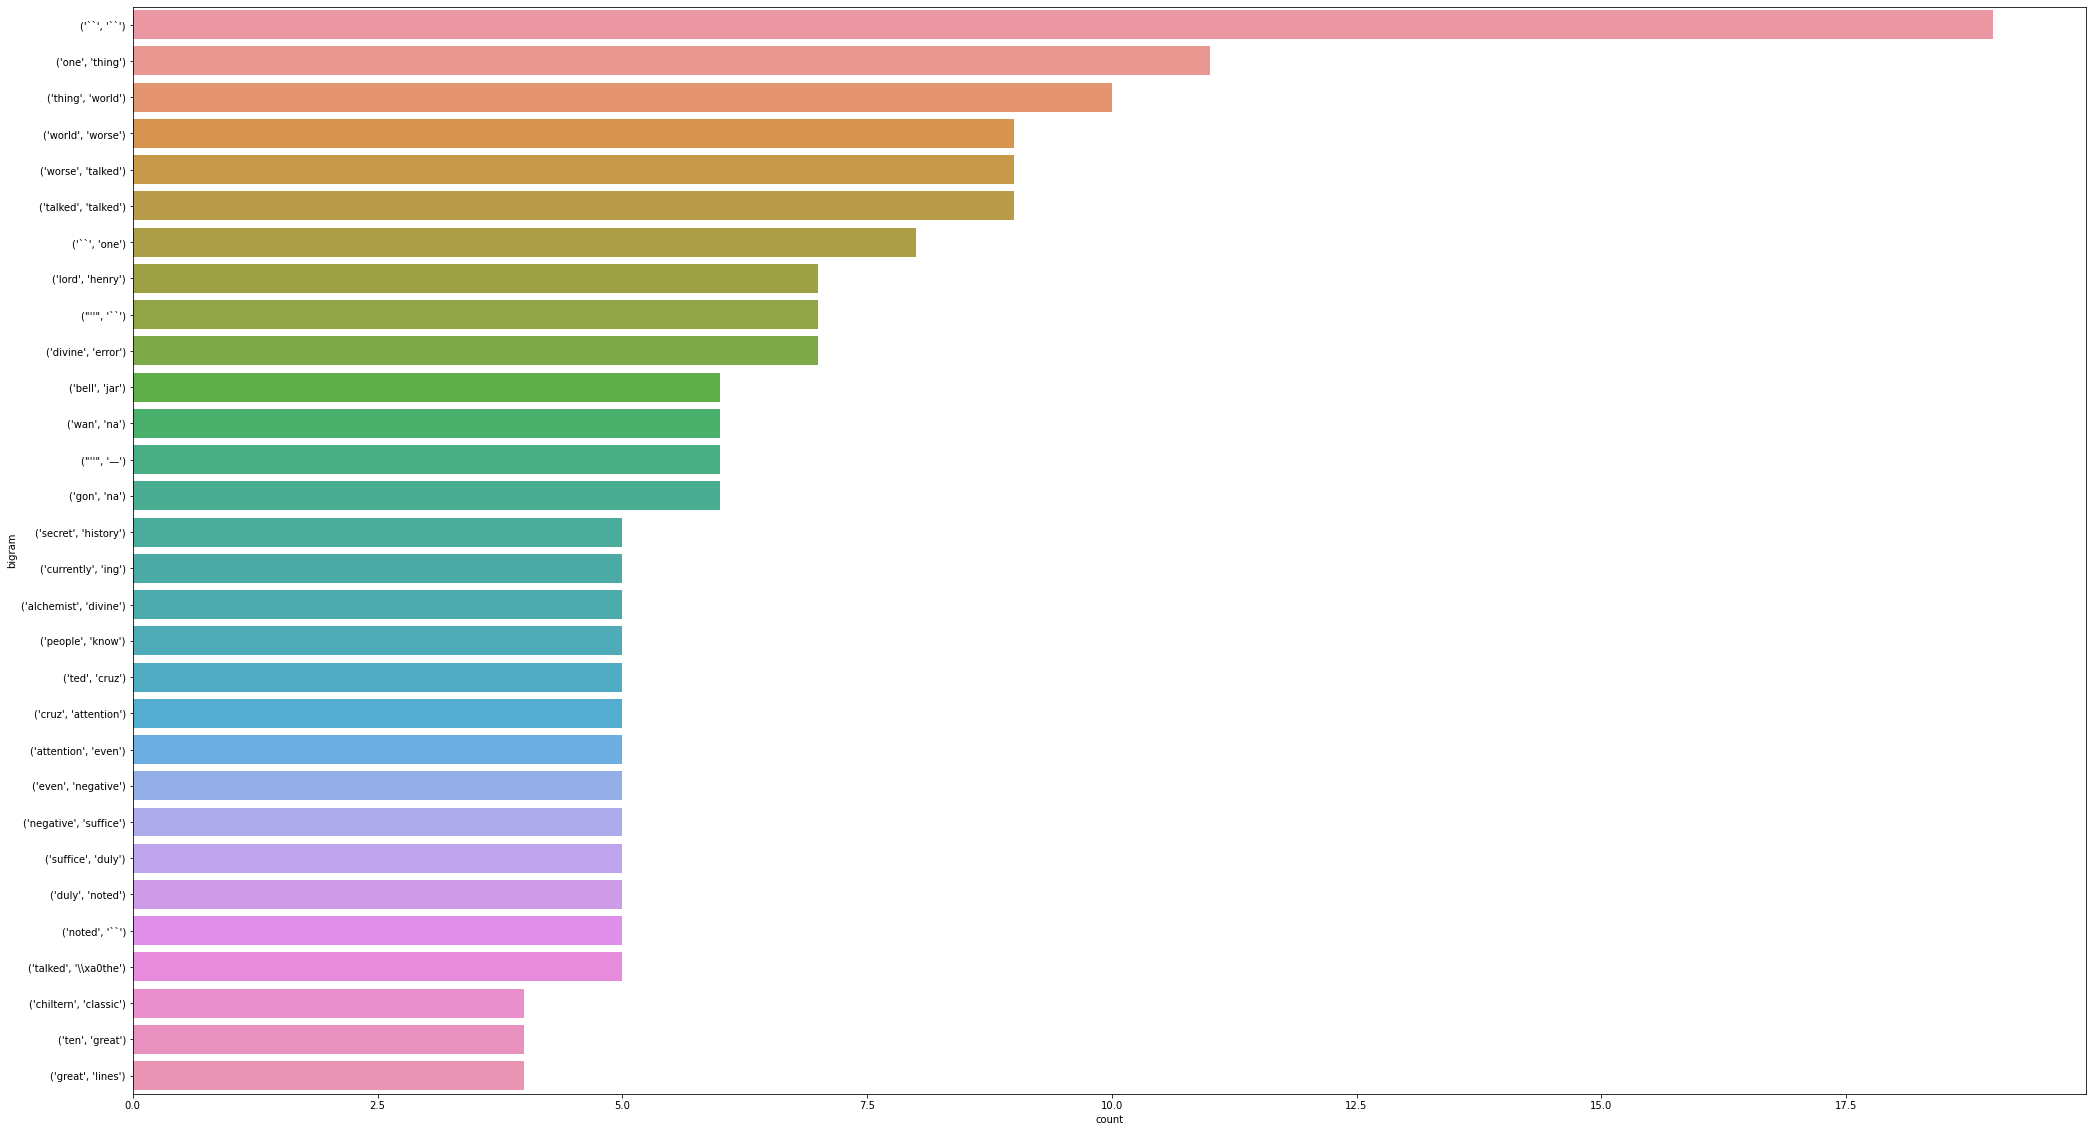

In [28]:
# bigrams visualization 
plt.figure(figsize = (35, 20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_bigram['count'], y = df_bigram['bigram'])

#### we find more association than the first bigrams like "secret history", "graet lines" ....

<AxesSubplot:xlabel='count', ylabel='trigram'>

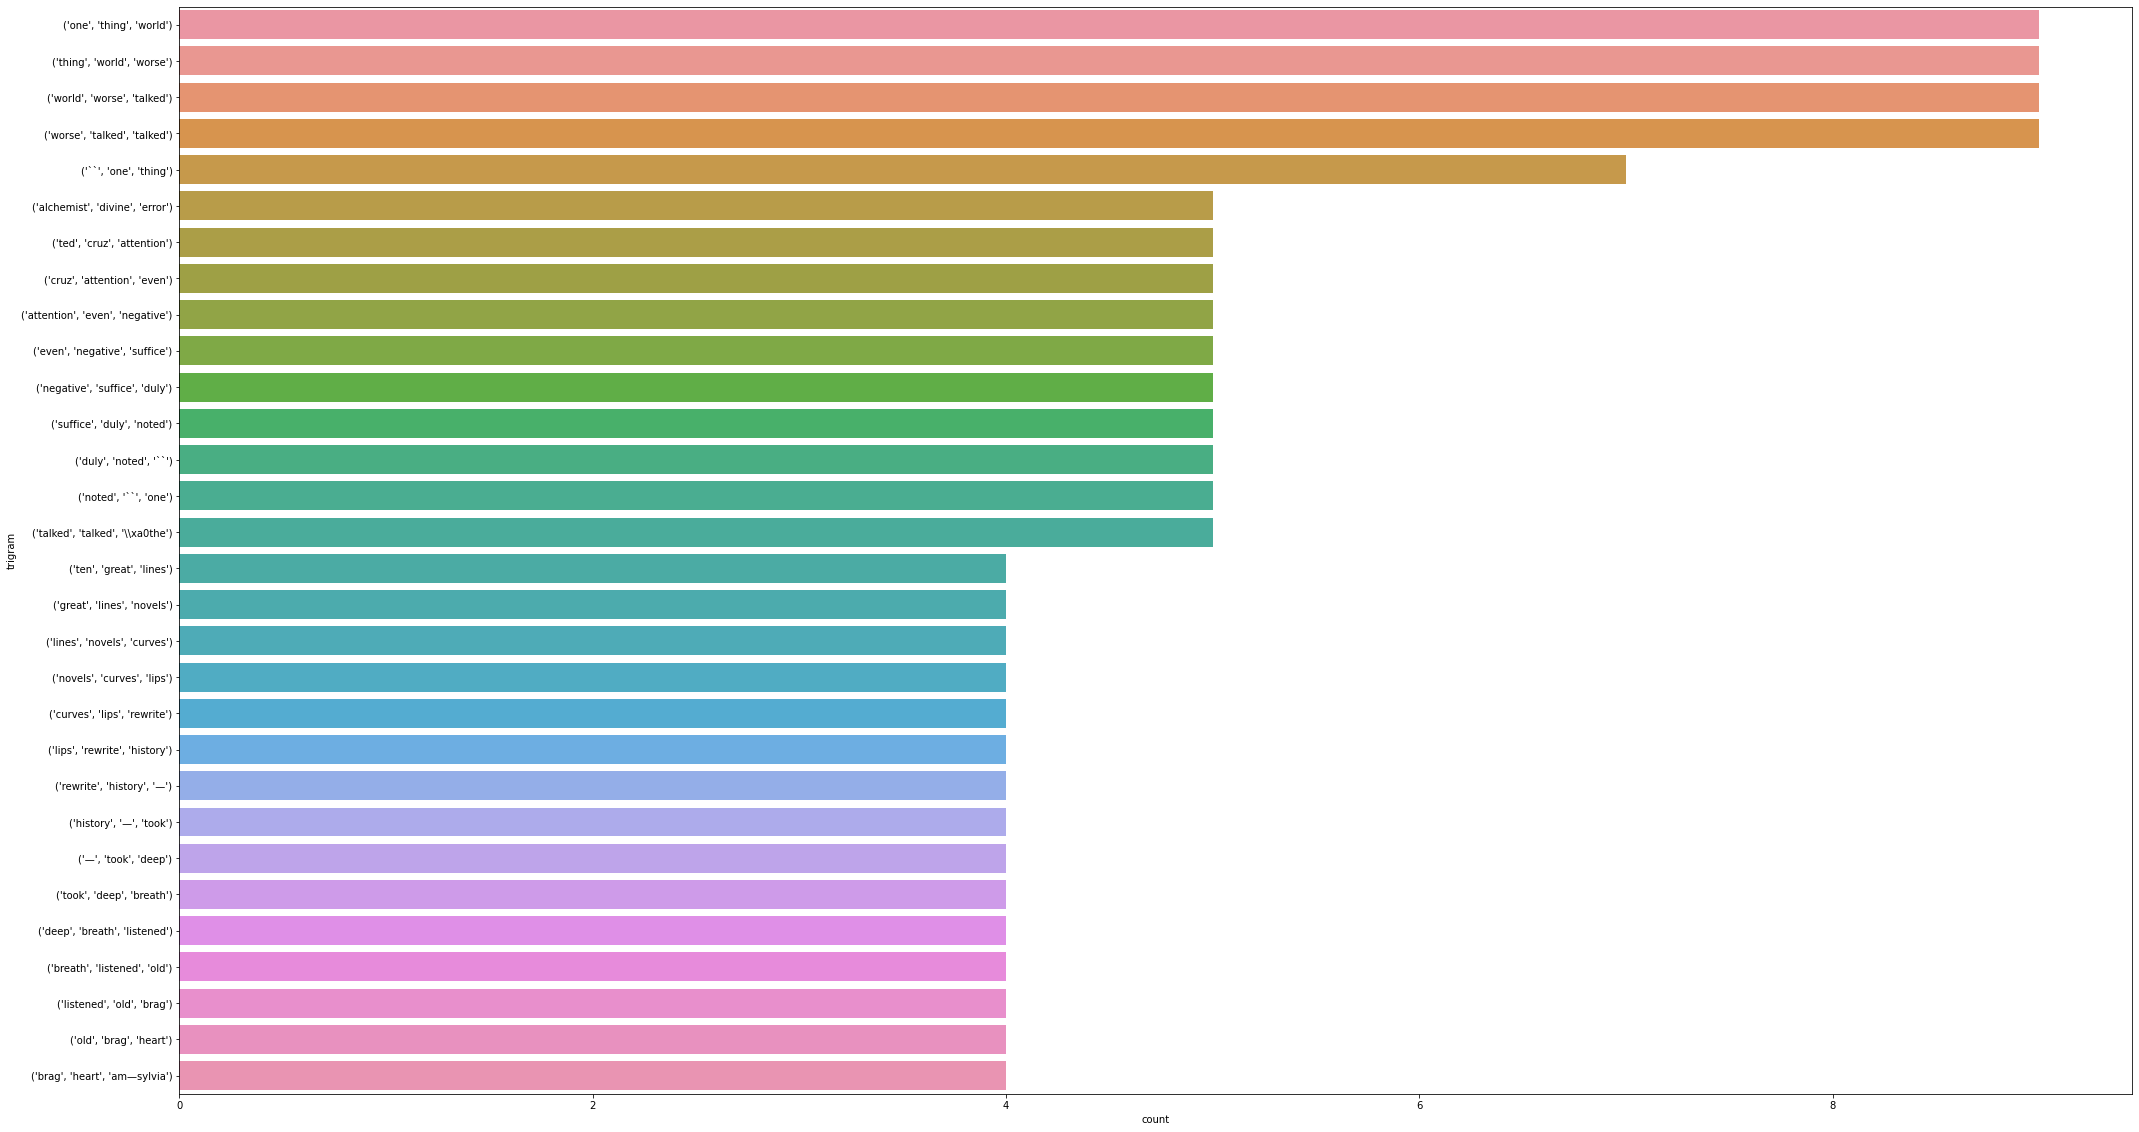

In [29]:
# trigrams visualization 
plt.figure(figsize = (35, 20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_trigram['count'], y = df_trigram['trigram'])

#### we find more association than the first trigrams like "old brag heart", "took deep breath" ....